In [1]:
# This program uses MiniConda Python 3.8
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit as cf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def func(x, a, b):
    # norm = np.linalg.norm(x)
    # x = x/norm
    return a * np.exp(-b * (x))


# Weibull distribution, not enough points to fit
# def func(x, a, b):
#     x_b = np.multiply(x, 1/b)
#     return (a/b)*np.power(x_b, (a-1))*np.exp((np.exp(np.multiply(-1.0, np.power(x_b, a)))))


def r_squared(x, y, a, b):
    res = y - func(x, a, b)
    ss_r = np.sum(res ** 2)
    ss_tot = np.sum((y - np.mean(y) ** 2))
    r_sq = np.round((1 - (ss_r / ss_tot)), 4)
    print(f'R^2 = {r_sq}')
    print(f'Curve Formula: y={a}*exp^(-{b}*(x)')


def plot_curve(x, y, a, b):
    x_est = np.arange(min(x), max(x))
    y_est = func(x_est, a, b)
    plt.figure(figsize=(8,8))
    plt.scatter(x, y, s=12)
    plt.plot(x_est, y_est, '--', color='red')
    plt.show()


def output(x, y, p0):
    popt, pcov = cf(func, x, y, p0)
    a = np.round(popt[0], 5)
    b = np.round(popt[1], 5)
    r_squared(x, y, a, b)
    plot_curve(x, y, a, b)
    return a, b


In [4]:
# Load Bayer Curves
# Data has media type to break into appropriate groups and run curves
all_coupons = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bayer_claritin.csv')
p0 = [1.0, .05]

Sunday FSI R^2 & Fit Chart
R^2 = 0.828
Curve Formula: y=0.97776*exp^(-0.02634*(x)


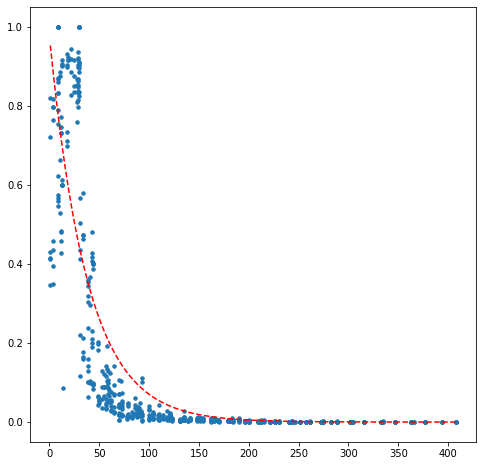

In [5]:
#@title
#Sunday FSI Curve
sun_fsi = all_coupons[all_coupons["Media_Type"] == "SUNDAY FSI"]
np_sun_fsi = sun_fsi[['Time_Since_Issue', 'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_sun_fsi[:, 0]
y = np_sun_fsi[:, 1]

print('Sunday FSI R^2 & Fit Chart')
a, b = output(x, y, p0)

# New Section

Paperless R^2 & Fit Chart
R^2 = 0.6869
Curve Formula: y=0.95756*exp^(-0.01963*(x)


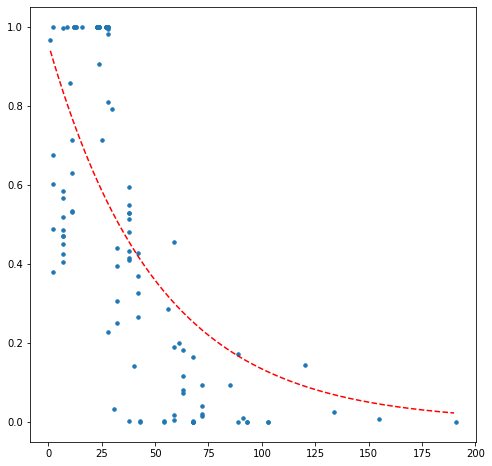

In [6]:
#@title
# Paperless Curve
paperless = all_coupons[all_coupons["Media_Type"] == "PAPERLESS"]
np_paperless = paperless[['Time_Since_Issue',
                          'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paperless[:, 0]
y = np_paperless[:, 1]

print('Paperless R^2 & Fit Chart')
a, b = output(x, y, p0)

Paperless + Print Group R^2 & Fit Chart
R^2 = 0.7332
Curve Formula: y=0.93633*exp^(-0.02373*(x)


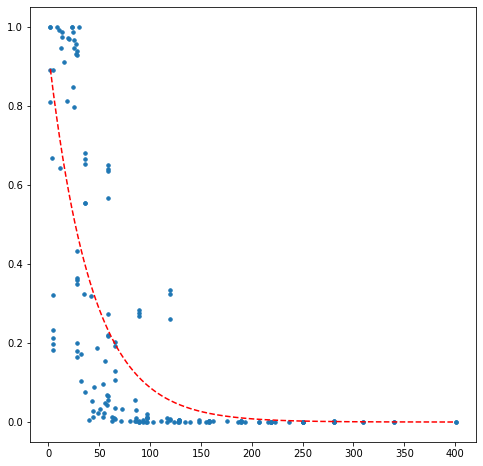

In [7]:
#@title
# Paperless + Print At Home, Print at Home, Paperless + Print at Home Curve

paper_print = all_coupons[all_coupons["Media_Type"].
                      isin(["PAPERLESS + PRINT AT HOME", "PRINT AT HOME", 
                            "PAPERLESS + PRINT AT HOME + HANDOUT"])]

np_paper_print = paper_print[['Time_Since_Issue',
                              'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paper_print[:, 0]
y = np_paper_print[:, 1]

print('Paperless + Print Group R^2 & Fit Chart')
a, b = output(x, y, p0)

Handout Group R^2 & Fit Chart
R^2 = 0.8819
Curve Formula: y=0.49015*exp^(-0.01138*(x)


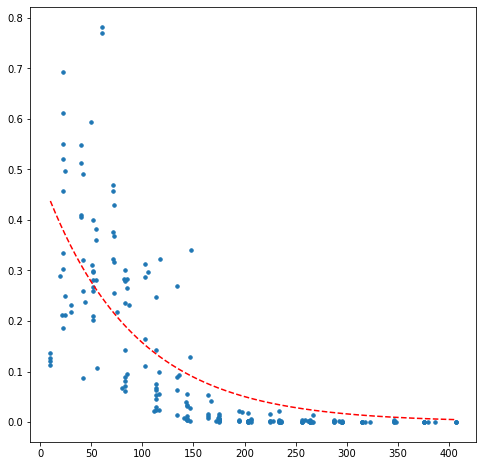

In [8]:
#@title
# HANDOUT, HANDOUT IN-STORE, HANDOUT IN-STORE DISPLAY, HANDOUT IN-STORE TEARPAD,
# HANDOUT SHELF DISPENSER, HANDOUT WITH SAMPLE, INSTANT ON-PACK,
# INSTANT ON-PACK FACTORY APPLIED, ON-PACK

handout = all_coupons[all_coupons["Media_Type"].
                      isin(["HANDOUT", "HANDOUT IN-STORE", 
                            "HANDOUT IN-STORE DISPLAY", 
                            "HANDOUT IN-STORE TEARPAD", 
                            "HANDOUT SHELF DISPENSER", 
                            "HANDOUT WITH SAMPLE", "INSTANT ON-PACK",
                            "INSTANT ON-PACK FACTORY APPLIED", "ON-PACK"])]

np_handout = handout[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_handout[:, 0]
y = np_handout[:, 1]

print('Handout Group R^2 & Fit Chart')
a, b = output(x, y, p0)

All Other Group R^2 & Fit Chart
R^2 = 0.8825
Curve Formula: y=0.30163*exp^(-0.00579*(x)


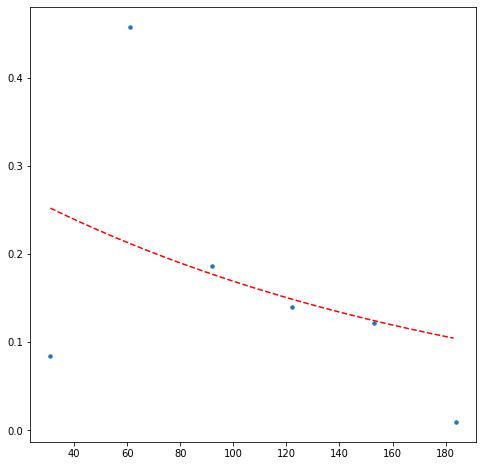

In [9]:
#@title
# All Other: MISCELLANEOUS MEDIA, DIRECT MAIL, DIRECT MAIL SOLO

misc = all_coupons[all_coupons["Media_Type"].isin(["MISCELLANEOUS MEDIA", 
                                                    "DIRECT MAIL SOLO",
                                                    "DIRECT MAIL"])]

np_misc = misc[['Time_Since_Issue',
                'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_misc[:, 0]
y = np_misc[:, 1]

print('All Other Group R^2 & Fit Chart')
a, b = output(x, y, p0)
